# Project: Used Car Price Prediction using Linear Regression 
       
The goal of this project is to predict the used car price based on various features.
Dataset to downloaded from the below link:
https://www.kaggle.com/datasets/ananaymital/us-used-cars-dataset

## Part1: Data Exploration

In [1]:
import time
import numpy as np
import pandas as pd
import scipy.sparse as sp

start = time.time()
# read in the dataset
pd.pandas.set_option('display.max_columns', None)
df = pd.read_csv('used_cars_data.csv')

print("Time taken to read dataset: %f seconds" % (time.time()-start))

print("The first five rows of dataset:")
df.head()


/Users/jingshu/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Time taken to read dataset: 184.321679 seconds
The first five rows of dataset:


,vin,back_legroom,bed,bed_height,bed_length,body_type,cabin,city,city_fuel_economy,combine_fuel_economy,daysonmarket,dealer_zip,description,engine_cylinders,engine_displacement,engine_type,exterior_color,fleet,frame_damaged,franchise_dealer,franchise_make,front_legroom,fuel_tank_volume,fuel_type,has_accidents,height,highway_fuel_economy,horsepower,interior_color,isCab,is_certified,is_cpo,is_new,is_oemcpo,latitude,length,listed_date,listing_color,listing_id,longitude,main_picture_url,major_options,make_name,maximum_seating,mileage,model_name,owner_count,power,price,salvage,savings_amount,seller_rating,sp_id,sp_name,theft_title,torque,transmission,transmission_display,trimId,trim_name,vehicle_damage_category,wheel_system,wheel_system_display,wheelbase,width,year
0,ZACNJABB5KPJ92081,35.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,Bayamon,NaN,NaN,522,960,[!@@Additional Info@@!]Engine: 2.4L I4 ZERO EV...,I4,1300.0,I4,Solar Yellow,NaN,NaN,True,Jeep,41.2 in,12.7 gal,Gasoline,NaN,66.5 in,NaN,177.0,Black,NaN,NaN,NaN,True,NaN,18.3988,166.6 in,2019-04-06,YELLOW,237132766,-66.1582,https://static.cargurus.com/images/forsale/202...,['Quick Order Package'],Jeep,5 seats,7.0,Renegade,NaN,"177 hp @ 5,750 RPM",23141.0,NaN,0,2.8,370599.0,Flagship Chrysler,NaN,"200 lb-ft @ 1,750 RPM",A,9-Speed Automatic Overdrive,t83804,Latitude FWD,NaN,FWD,Front-Wheel Drive,101.2 in,79.6 in,2019
1,SALCJ2FX1LH858117,38.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,San Juan,NaN,NaN,207,922,"[!@@Additional Info@@!]Keyless Entry,Ebony Mor...",I4,2000.0,I4,Narvik Black,NaN,NaN,True,Land Rover,39.1 in,17.7 gal,Gasoline,NaN,68 in,NaN,246.0,Black (Ebony),NaN,NaN,NaN,True,NaN,18.4439,181 in,2020-02-15,BLACK,265946296,-66.0785,https://static.cargurus.com/images/forsale/202...,['Adaptive Cruise Control'],Land Rover,7 seats,8.0,Discovery Sport,NaN,"246 hp @ 5,500 RPM",46500.0,NaN,0,3.0,389227.0,Land Rover San Juan,NaN,"269 lb-ft @ 1,400 RPM",A,9-Speed Automatic Overdrive,t86759,S AWD,NaN,AWD,All-Wheel Drive,107.9 in,85.6 in,2020
2,JF1VA2M67G9829723,35.4 in,NaN,NaN,NaN,Sedan,NaN,Guaynabo,17.0,NaN,1233,969,NaN,H4,2500.0,H4,None,False,False,True,FIAT,43.3 in,15.9 gal,Gasoline,False,58.1 in,23.0,305.0,None,False,NaN,NaN,False,NaN,18.3467,180.9 in,2017-04-25,UNKNOWN,173473508,-66.1098,NaN,"['Alloy Wheels', 'Bluetooth', 'Backup Camera',...",Subaru,5 seats,NaN,WRX STI,3.0,"305 hp @ 6,000 RPM",46995.0,False,0,NaN,370467.0,FIAT de San Juan,False,"290 lb-ft @ 4,000 RPM",M,6-Speed Manual,t58994,Base,NaN,AWD,All-Wheel Drive,104.3 in,78.9 in,2016
3,SALRR2RV0L2433391,37.6 in,NaN,NaN,NaN,SUV / Crossover,NaN,San Juan,NaN,NaN,196,922,"[!@@Additional Info@@!]Fog Lights,7 Seat Packa...",V6,3000.0,V6,Eiger Gray,NaN,NaN,True,Land Rover,39 in,23.5 gal,Gasoline,NaN,73 in,NaN,340.0,Gray (Ebony/Ebony/Ebony),NaN,NaN,NaN,True,NaN,18.4439,195.1 in,2020-02-26,GRAY,266911050,-66.0785,https://static.cargurus.com/images/forsale/202...,NaN,Land Rover,7 seats,11.0,Discovery,NaN,"340 hp @ 6,500 RPM",67430.0,NaN,0,3.0,389227.0,Land Rover San Juan,NaN,"332 lb-ft @ 3,500 RPM",A,8-Speed Automatic Overdrive,t86074,V6 HSE AWD,NaN,AWD,All-Wheel Drive,115 in,87.4 in,2020
4,SALCJ2FXXLH862327,38.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,San Juan,NaN,NaN,137,922,"[!@@Additional Info@@!]Keyless Entry,Ebony Mor...",I4,2000.0,I4,Narvik Black,NaN,NaN,True,Land Rover,39.1 in,17.7 gal,Gasoline,NaN,68 in,NaN,246.0,Black (Ebony),NaN,NaN,NaN,True,NaN,18.4439,181 in,2020-04-25,BLACK,270957414,-66.0785,https://static.cargurus.com/images/forsale/202...,['Adaptive Cruise Control'],Land Rover,7 seats,7.0,Discovery Sport,NaN,"246 hp @ 5,500 RPM",48880.0,NaN,0,3.0,389227.0,Land Rover San Juan,NaN,"269 lb-ft @ 1,400 RPM",A,9-Speed Automatic Overdrive,t86759,S AWD,NaN,AWD,All-Wheel Drive,107.9 in,85.6 in,2020


### Drop Duplicate values

In [2]:
# Remove rows with duplicate vehicle id numbers

df2 = df.drop_duplicates(subset=["vin"])

print("The size of original dataset: %d * %d" %(df.shape[0], df.shape[1]))
print("The size of dataset after dropping duplicate vin: %d * %d" %(df2.shape[0], df2.shape[1]))


The size of original dataset: 3000040 * 66
The size of dataset after dropping duplicate vin: 3000000 * 66


### Missing values

In [3]:
## check the percentage of nan values present in each feature

## step1: make the list of features which has missing values
features_with_nan = [features for features in df2.columns if df2[features].isnull().sum()>1]
print('features with nan values: ', len(features_with_nan))

## step2: print the feature name and the percentage of missing values
nan_percentage = []
print('missing values percentage\n --------------------')
for feature in features_with_nan:
    percentage = np.round(df2[feature].isnull().mean()*100, 2)
    nan_percentage.append(percentage)
    print(feature, ': ', percentage, '%')


features with nan values:  49
missing values percentage
 --------------------
back_legroom :  5.31 %
bed :  99.35 %
bed_height :  85.7 %
bed_length :  85.7 %
body_type :  0.45 %
cabin :  97.88 %
city_fuel_economy :  16.38 %
combine_fuel_economy :  100.0 %
description :  2.6 %
engine_cylinders :  3.35 %
engine_displacement :  5.75 %
engine_type :  3.35 %
exterior_color :  0.0 %
fleet :  47.55 %
frame_damaged :  47.55 %
franchise_make :  19.09 %
front_legroom :  5.31 %
fuel_tank_volume :  5.31 %
fuel_type :  2.76 %
has_accidents :  47.55 %
height :  5.31 %
highway_fuel_economy :  16.38 %
horsepower :  5.75 %
interior_color :  0.01 %
isCab :  47.55 %
is_certified :  100.0 %
is_cpo :  93.9 %
is_oemcpo :  95.49 %
length :  5.31 %
main_picture_url :  12.3 %
major_options :  6.67 %
maximum_seating :  5.31 %
mileage :  4.81 %
owner_count :  50.57 %
power :  16.05 %
salvage :  47.55 %
seller_rating :  1.36 %
sp_id :  0.0 %
theft_title :  47.55 %
torque :  17.26 %
transmission :  2.14 %
transmis

In [4]:
## step3: dropping features with nan_percentage >= 90%

features_with_na = []
na_percentage = []
drop_list = []
for i, percentage in enumerate(nan_percentage):
    if percentage < 90.0:
        features_with_na.append(features_with_nan[i])
        na_percentage.append(percentage)
    else:
        drop_list.append(features_with_nan[i])
        
print("Dropping features with nan_percentage >= 90% :", len(drop_list),'\n' ,drop_list)

# dropping features with nan_percentage >= 90%
dataset = df2.drop(drop_list, axis=1)

print("\nnew dataset size: %d * %d" %(dataset.shape[0], dataset.shape[1]) )


Dropping features with nan_percentage >= 90% : 7 
 ['bed', 'cabin', 'combine_fuel_economy', 'is_certified', 'is_cpo', 'is_oemcpo', 'vehicle_damage_category']

new dataset size: 3000000 * 59


### numerical variables

In [5]:
# list of numerical variables
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
dataset[numerical_features].head()

Number of numerical variables:  17


,city_fuel_economy,daysonmarket,engine_displacement,franchise_dealer,highway_fuel_economy,horsepower,is_new,latitude,listing_id,longitude,mileage,owner_count,price,savings_amount,seller_rating,sp_id,year
0,NaN,522,1300.0,True,NaN,177.0,True,18.3988,237132766,-66.1582,7.0,NaN,23141.0,0,2.8,370599.0,2019
1,NaN,207,2000.0,True,NaN,246.0,True,18.4439,265946296,-66.0785,8.0,NaN,46500.0,0,3.0,389227.0,2020
2,17.0,1233,2500.0,True,23.0,305.0,False,18.3467,173473508,-66.1098,NaN,3.0,46995.0,0,NaN,370467.0,2016
3,NaN,196,3000.0,True,NaN,340.0,True,18.4439,266911050,-66.0785,11.0,NaN,67430.0,0,3.0,389227.0,2020
4,NaN,137,2000.0,True,NaN,246.0,True,18.4439,270957414,-66.0785,7.0,NaN,48880.0,0,3.0,389227.0,2020


year:
 [1915, 1921, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
samples of each year:
 [4, 2, 13, 2, 3, 9, 6, 11, 22, 24, 18, 21, 2, 3, 3, 5, 11, 11, 16, 32, 25, 2, 4, 21, 30, 25, 27, 26, 19, 34, 44, 102, 67, 128, 33, 41, 49, 53, 76, 95, 133, 195, 221, 228, 180, 263, 231, 138, 164, 141, 82, 79, 122, 97, 138, 149, 86, 99, 99, 113, 135, 150, 209, 223, 227, 264, 214, 280, 277, 353, 511, 614, 630, 992, 1178, 1914, 2685, 3509, 5332, 7444, 10157, 12695, 16581, 22870, 27

Text(0.5, 1.0, 'Price vs Year')

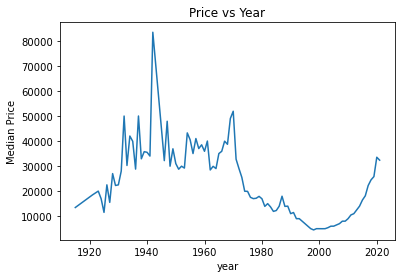

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

# 
years = list(dataset['year'])
year_list = list(set(years))
print('year:\n', year_list)

year_cnt = [ 0 for i in range(len(year_list))]
for i, y in enumerate(year_list):
    year_cnt[i] = years.count(y)

print('samples of each year:\n', year_cnt)

# check whether there is a relation between year and the price
dataset.groupby('year')['price'].median().plot()
plt.xlabel('year')
plt.ylabel('Median Price')
plt.title("Price vs Year")

In [7]:
## 1. Discrete Variables

discrete_feature = [feature for feature in numerical_features if len(dataset[feature].unique())<25]
print("Discrete Variables Count: %d" %len(discrete_feature))

dataset[discrete_feature].head()

Discrete Variables Count: 3


,franchise_dealer,is_new,owner_count
0,True,True,NaN
1,True,True,NaN
2,True,False,3.0
3,True,True,NaN
4,True,True,NaN


In [8]:
## 2.Continous variable 

continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+['year']]
print("Continuous feature Count: %d" %len(continuous_feature))

dataset[continuous_feature].head()

Continuous feature Count: 13


,city_fuel_economy,daysonmarket,engine_displacement,highway_fuel_economy,horsepower,latitude,listing_id,longitude,mileage,price,savings_amount,seller_rating,sp_id
0,NaN,522,1300.0,NaN,177.0,18.3988,237132766,-66.1582,7.0,23141.0,0,2.8,370599.0
1,NaN,207,2000.0,NaN,246.0,18.4439,265946296,-66.0785,8.0,46500.0,0,3.0,389227.0
2,17.0,1233,2500.0,23.0,305.0,18.3467,173473508,-66.1098,NaN,46995.0,0,NaN,370467.0
3,NaN,196,3000.0,NaN,340.0,18.4439,266911050,-66.0785,11.0,67430.0,0,3.0,389227.0
4,NaN,137,2000.0,NaN,246.0,18.4439,270957414,-66.0785,7.0,48880.0,0,3.0,389227.0


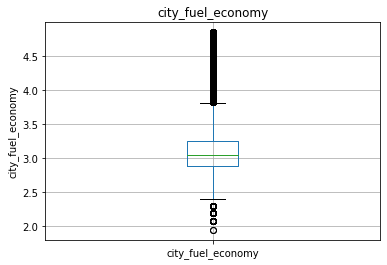

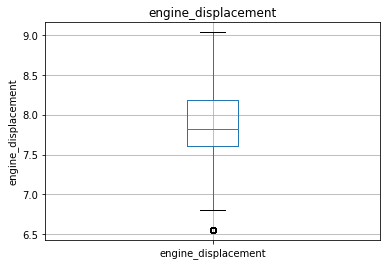

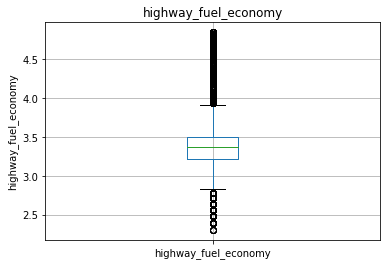

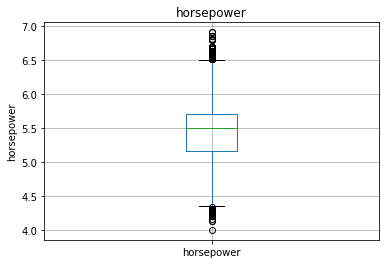

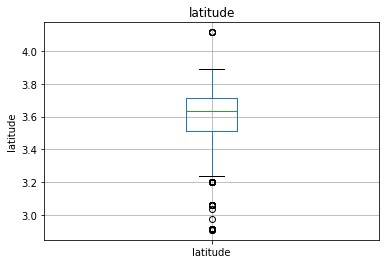

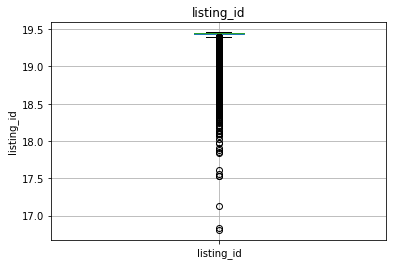

/Users/jingshu/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


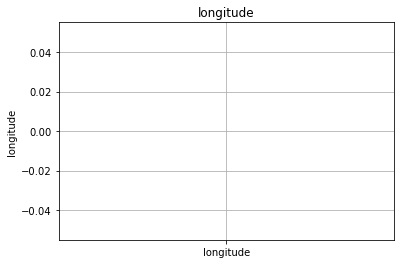

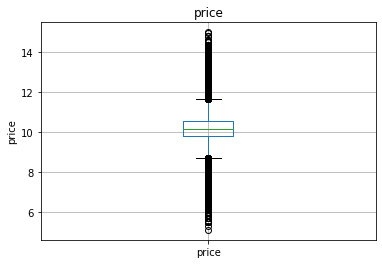

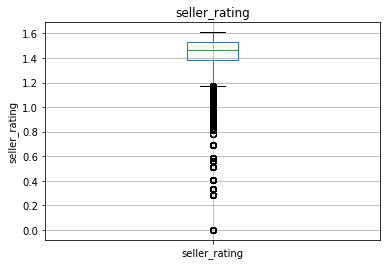

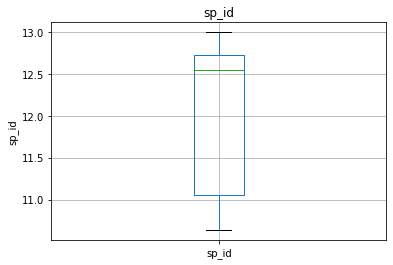

In [9]:
## Outliers

for feature in continuous_feature:
    data=dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()
        

### categorical variables

In [10]:
# list of categorical variables
categorical_features=[feature for feature in dataset.columns if dataset[feature].dtypes=='O' and feature not in ['vin','listed_date','description','main_picture_url','major_options']]
print('Number of categorical variables: ', len(categorical_features))

# visualise the numerical variables
dataset[categorical_features].head()


Number of categorical variables:  37


,back_legroom,bed_height,bed_length,body_type,city,dealer_zip,engine_cylinders,engine_type,exterior_color,fleet,frame_damaged,franchise_make,front_legroom,fuel_tank_volume,fuel_type,has_accidents,height,interior_color,isCab,length,listing_color,make_name,maximum_seating,model_name,power,salvage,sp_name,theft_title,torque,transmission,transmission_display,trimId,trim_name,wheel_system,wheel_system_display,wheelbase,width
0,35.1 in,NaN,NaN,SUV / Crossover,Bayamon,960,I4,I4,Solar Yellow,NaN,NaN,Jeep,41.2 in,12.7 gal,Gasoline,NaN,66.5 in,Black,NaN,166.6 in,YELLOW,Jeep,5 seats,Renegade,"177 hp @ 5,750 RPM",NaN,Flagship Chrysler,NaN,"200 lb-ft @ 1,750 RPM",A,9-Speed Automatic Overdrive,t83804,Latitude FWD,FWD,Front-Wheel Drive,101.2 in,79.6 in
1,38.1 in,NaN,NaN,SUV / Crossover,San Juan,922,I4,I4,Narvik Black,NaN,NaN,Land Rover,39.1 in,17.7 gal,Gasoline,NaN,68 in,Black (Ebony),NaN,181 in,BLACK,Land Rover,7 seats,Discovery Sport,"246 hp @ 5,500 RPM",NaN,Land Rover San Juan,NaN,"269 lb-ft @ 1,400 RPM",A,9-Speed Automatic Overdrive,t86759,S AWD,AWD,All-Wheel Drive,107.9 in,85.6 in
2,35.4 in,NaN,NaN,Sedan,Guaynabo,969,H4,H4,None,False,False,FIAT,43.3 in,15.9 gal,Gasoline,False,58.1 in,None,False,180.9 in,UNKNOWN,Subaru,5 seats,WRX STI,"305 hp @ 6,000 RPM",False,FIAT de San Juan,False,"290 lb-ft @ 4,000 RPM",M,6-Speed Manual,t58994,Base,AWD,All-Wheel Drive,104.3 in,78.9 in
3,37.6 in,NaN,NaN,SUV / Crossover,San Juan,922,V6,V6,Eiger Gray,NaN,NaN,Land Rover,39 in,23.5 gal,Gasoline,NaN,73 in,Gray (Ebony/Ebony/Ebony),NaN,195.1 in,GRAY,Land Rover,7 seats,Discovery,"340 hp @ 6,500 RPM",NaN,Land Rover San Juan,NaN,"332 lb-ft @ 3,500 RPM",A,8-Speed Automatic Overdrive,t86074,V6 HSE AWD,AWD,All-Wheel Drive,115 in,87.4 in
4,38.1 in,NaN,NaN,SUV / Crossover,San Juan,922,I4,I4,Narvik Black,NaN,NaN,Land Rover,39.1 in,17.7 gal,Gasoline,NaN,68 in,Black (Ebony),NaN,181 in,BLACK,Land Rover,7 seats,Discovery Sport,"246 hp @ 5,500 RPM",NaN,Land Rover San Juan,NaN,"269 lb-ft @ 1,400 RPM",A,9-Speed Automatic Overdrive,t86759,S AWD,AWD,All-Wheel Drive,107.9 in,85.6 in


In [11]:
for feature in categorical_features:
    print('The feature is %s and number of categories are %d' %(feature,len(dataset[feature].unique())))

The feature is back_legroom and number of categories are 220
The feature is bed_height and number of categories are 2
The feature is bed_length and number of categories are 84
The feature is body_type and number of categories are 10
The feature is city and number of categories are 4687
The feature is dealer_zip and number of categories are 9215
The feature is engine_cylinders and number of categories are 40
The feature is engine_type and number of categories are 40
The feature is exterior_color and number of categories are 28666
The feature is fleet and number of categories are 3
The feature is frame_damaged and number of categories are 3
The feature is franchise_make and number of categories are 49
The feature is front_legroom and number of categories are 102
The feature is fuel_tank_volume and number of categories are 183
The feature is fuel_type and number of categories are 9
The feature is has_accidents and number of categories are 3
The feature is height and number of categories a

In [12]:
dataset.shape

(3000000, 59)

## Part 2: Data preprocessing

In [13]:
data = dataset.copy(deep=True)

### 2.1 Split categorical variables

In [14]:
# split numbers from categorical variables

def splitCategoricalValues(colName):
    l = []
    col = data[colName].tolist()
    for item in col:
        if type(item)==str:
            if item.split()[0]=='--':
                l.append(float('NaN'))
            else:
                l.append(float(item.split()[0]))
        else:
            l.append(float(item))   
            
    return l 


In [15]:
categorical_split_list = ['back_legroom','front_legroom','fuel_tank_volume','height','length','maximum_seating','wheelbase','width']

for label in categorical_split_list:
    data[label] = splitCategoricalValues(label)
    
data.head()

,vin,back_legroom,bed_height,bed_length,body_type,city,city_fuel_economy,daysonmarket,dealer_zip,description,engine_cylinders,engine_displacement,engine_type,exterior_color,fleet,frame_damaged,franchise_dealer,franchise_make,front_legroom,fuel_tank_volume,fuel_type,has_accidents,height,highway_fuel_economy,horsepower,interior_color,isCab,is_new,latitude,length,listed_date,listing_color,listing_id,longitude,main_picture_url,major_options,make_name,maximum_seating,mileage,model_name,owner_count,power,price,salvage,savings_amount,seller_rating,sp_id,sp_name,theft_title,torque,transmission,transmission_display,trimId,trim_name,wheel_system,wheel_system_display,wheelbase,width,year
0,ZACNJABB5KPJ92081,35.1,NaN,NaN,SUV / Crossover,Bayamon,NaN,522,960,[!@@Additional Info@@!]Engine: 2.4L I4 ZERO EV...,I4,1300.0,I4,Solar Yellow,NaN,NaN,True,Jeep,41.2,12.7,Gasoline,NaN,66.5,NaN,177.0,Black,NaN,True,18.3988,166.6,2019-04-06,YELLOW,237132766,-66.1582,https://static.cargurus.com/images/forsale/202...,['Quick Order Package'],Jeep,5.0,7.0,Renegade,NaN,"177 hp @ 5,750 RPM",23141.0,NaN,0,2.8,370599.0,Flagship Chrysler,NaN,"200 lb-ft @ 1,750 RPM",A,9-Speed Automatic Overdrive,t83804,Latitude FWD,FWD,Front-Wheel Drive,101.2,79.6,2019
1,SALCJ2FX1LH858117,38.1,NaN,NaN,SUV / Crossover,San Juan,NaN,207,922,"[!@@Additional Info@@!]Keyless Entry,Ebony Mor...",I4,2000.0,I4,Narvik Black,NaN,NaN,True,Land Rover,39.1,17.7,Gasoline,NaN,68.0,NaN,246.0,Black (Ebony),NaN,True,18.4439,181.0,2020-02-15,BLACK,265946296,-66.0785,https://static.cargurus.com/images/forsale/202...,['Adaptive Cruise Control'],Land Rover,7.0,8.0,Discovery Sport,NaN,"246 hp @ 5,500 RPM",46500.0,NaN,0,3.0,389227.0,Land Rover San Juan,NaN,"269 lb-ft @ 1,400 RPM",A,9-Speed Automatic Overdrive,t86759,S AWD,AWD,All-Wheel Drive,107.9,85.6,2020
2,JF1VA2M67G9829723,35.4,NaN,NaN,Sedan,Guaynabo,17.0,1233,969,NaN,H4,2500.0,H4,None,False,False,True,FIAT,43.3,15.9,Gasoline,False,58.1,23.0,305.0,None,False,False,18.3467,180.9,2017-04-25,UNKNOWN,173473508,-66.1098,NaN,"['Alloy Wheels', 'Bluetooth', 'Backup Camera',...",Subaru,5.0,NaN,WRX STI,3.0,"305 hp @ 6,000 RPM",46995.0,False,0,NaN,370467.0,FIAT de San Juan,False,"290 lb-ft @ 4,000 RPM",M,6-Speed Manual,t58994,Base,AWD,All-Wheel Drive,104.3,78.9,2016
3,SALRR2RV0L2433391,37.6,NaN,NaN,SUV / Crossover,San Juan,NaN,196,922,"[!@@Additional Info@@!]Fog Lights,7 Seat Packa...",V6,3000.0,V6,Eiger Gray,NaN,NaN,True,Land Rover,39.0,23.5,Gasoline,NaN,73.0,NaN,340.0,Gray (Ebony/Ebony/Ebony),NaN,True,18.4439,195.1,2020-02-26,GRAY,266911050,-66.0785,https://static.cargurus.com/images/forsale/202...,NaN,Land Rover,7.0,11.0,Discovery,NaN,"340 hp @ 6,500 RPM",67430.0,NaN,0,3.0,389227.0,Land Rover San Juan,NaN,"332 lb-ft @ 3,500 RPM",A,8-Speed Automatic Overdrive,t86074,V6 HSE AWD,AWD,All-Wheel Drive,115.0,87.4,2020
4,SALCJ2FXXLH862327,38.1,NaN,NaN,SUV / Crossover,San Juan,NaN,137,922,"[!@@Additional Info@@!]Keyless Entry,Ebony Mor...",I4,2000.0,I4,Narvik Black,NaN,NaN,True,Land Rover,39.1,17.7,Gasoline,NaN,68.0,NaN,246.0,Black (Ebony),NaN,True,18.4439,181.0,2020-04-25,BLACK,270957414,-66.0785,https://static.cargurus.com/images/forsale/202...,['Adaptive Cruise Control'],Land Rover,7.0,7.0,Discovery Sport,NaN,"246 hp @ 5,500 RPM",48880.0,NaN,0,3.0,389227.0,Land Rover San Juan,NaN,"269 lb-ft @ 1,400 RPM",A,9-Speed Automatic Overdrive,t86759,S AWD,AWD,All-Wheel Drive,107.9,85.6,2020


In [16]:
# split listed year from listed_date

def splitListedYear(colName):
    l = []
    col = data[colName].tolist()
    for item in col:
        if item:
            l.append(int(item.split('-')[0]))
    return l 


In [17]:
data['listed_date'] = splitListedYear('listed_date')

print(data['listed_date'][0])

2019


In [18]:
# split speed from transmission_display
speed = []

for item in data['transmission_display'].tolist():
    if type(item)== str and '-' in item:
        speed.append(float(item.split('-')[0]))
    else:
        speed.append(float('NaN'))

# put speed in variable "transmission_display"
data['transmission_display'] = speed
print(data['transmission_display'][:5])

0    9.0
1    9.0
2    6.0
3    8.0
4    9.0
Name: transmission_display, dtype: float64


In [19]:
# split 'power' and 'torque'
def splitFeatureToTwo(colName):
    l1 = []
    l2 = []
    for item in data[colName].tolist():
        if type(item)==str and '@' in item:
            l1.append(float(item.split()[0].replace(",", "")))
            l2.append(float(item.split()[3].replace(",", "")))
        else:
            l1.append(float('NaN'))
            l2.append(float('NaN'))
    
    return l1, l2

power_hp, power_RPM = splitFeatureToTwo('power')
torque_lb_ft, torque_RPM = splitFeatureToTwo('torque')

In [20]:
# insert new columns('power_hp', 'power_RPM', 'torque_lb_ft', 'torque_RPM') in dataframe 

df_tmp = pd.DataFrame(power_hp,columns=['power_hp'])
data = pd.concat([data,df_tmp], axis=1)

df_tmp = pd.DataFrame(power_RPM,columns=['power_RPM'])
data = pd.concat([data,df_tmp], axis=1)

df_tmp = pd.DataFrame(torque_lb_ft,columns=['torque_lb_ft'])
data = pd.concat([data,df_tmp], axis=1)

df_tmp = pd.DataFrame(torque_RPM,columns=['torque_RPM'])
data = pd.concat([data,df_tmp], axis=1)

data.head()

,vin,back_legroom,bed_height,bed_length,body_type,city,city_fuel_economy,daysonmarket,dealer_zip,description,engine_cylinders,engine_displacement,engine_type,exterior_color,fleet,frame_damaged,franchise_dealer,franchise_make,front_legroom,fuel_tank_volume,fuel_type,has_accidents,height,highway_fuel_economy,horsepower,interior_color,isCab,is_new,latitude,length,listed_date,listing_color,listing_id,longitude,main_picture_url,major_options,make_name,maximum_seating,mileage,model_name,owner_count,power,price,salvage,savings_amount,seller_rating,sp_id,sp_name,theft_title,torque,transmission,transmission_display,trimId,trim_name,wheel_system,wheel_system_display,wheelbase,width,year,power_hp,power_RPM,torque_lb_ft,torque_RPM
0,ZACNJABB5KPJ92081,35.1,NaN,NaN,SUV / Crossover,Bayamon,NaN,522.0,960,[!@@Additional Info@@!]Engine: 2.4L I4 ZERO EV...,I4,1300.0,I4,Solar Yellow,NaN,NaN,True,Jeep,41.2,12.7,Gasoline,NaN,66.5,NaN,177.0,Black,NaN,True,18.3988,166.6,2019.0,YELLOW,237132766.0,-66.1582,https://static.cargurus.com/images/forsale/202...,['Quick Order Package'],Jeep,5.0,7.0,Renegade,NaN,"177 hp @ 5,750 RPM",23141.0,NaN,0.0,2.8,370599.0,Flagship Chrysler,NaN,"200 lb-ft @ 1,750 RPM",A,9.0,t83804,Latitude FWD,FWD,Front-Wheel Drive,101.2,79.6,2019.0,177.0,5750.0,200.0,1750.0
1,SALCJ2FX1LH858117,38.1,NaN,NaN,SUV / Crossover,San Juan,NaN,207.0,922,"[!@@Additional Info@@!]Keyless Entry,Ebony Mor...",I4,2000.0,I4,Narvik Black,NaN,NaN,True,Land Rover,39.1,17.7,Gasoline,NaN,68.0,NaN,246.0,Black (Ebony),NaN,True,18.4439,181.0,2020.0,BLACK,265946296.0,-66.0785,https://static.cargurus.com/images/forsale/202...,['Adaptive Cruise Control'],Land Rover,7.0,8.0,Discovery Sport,NaN,"246 hp @ 5,500 RPM",46500.0,NaN,0.0,3.0,389227.0,Land Rover San Juan,NaN,"269 lb-ft @ 1,400 RPM",A,9.0,t86759,S AWD,AWD,All-Wheel Drive,107.9,85.6,2020.0,246.0,5500.0,269.0,1400.0
2,JF1VA2M67G9829723,35.4,NaN,NaN,Sedan,Guaynabo,17.0,1233.0,969,NaN,H4,2500.0,H4,None,False,False,True,FIAT,43.3,15.9,Gasoline,False,58.1,23.0,305.0,None,False,False,18.3467,180.9,2017.0,UNKNOWN,173473508.0,-66.1098,NaN,"['Alloy Wheels', 'Bluetooth', 'Backup Camera',...",Subaru,5.0,NaN,WRX STI,3.0,"305 hp @ 6,000 RPM",46995.0,False,0.0,NaN,370467.0,FIAT de San Juan,False,"290 lb-ft @ 4,000 RPM",M,6.0,t58994,Base,AWD,All-Wheel Drive,104.3,78.9,2016.0,305.0,6000.0,290.0,4000.0
3,SALRR2RV0L2433391,37.6,NaN,NaN,SUV / Crossover,San Juan,NaN,196.0,922,"[!@@Additional Info@@!]Fog Lights,7 Seat Packa...",V6,3000.0,V6,Eiger Gray,NaN,NaN,True,Land Rover,39.0,23.5,Gasoline,NaN,73.0,NaN,340.0,Gray (Ebony/Ebony/Ebony),NaN,True,18.4439,195.1,2020.0,GRAY,266911050.0,-66.0785,https://static.cargurus.com/images/forsale/202...,NaN,Land Rover,7.0,11.0,Discovery,NaN,"340 hp @ 6,500 RPM",67430.0,NaN,0.0,3.0,389227.0,Land Rover San Juan,NaN,"332 lb-ft @ 3,500 RPM",A,8.0,t86074,V6 HSE AWD,AWD,All-Wheel Drive,115.0,87.4,2020.0,340.0,6500.0,332.0,3500.0
4,SALCJ2FXXLH862327,38.1,NaN,NaN,SUV / Crossover,San Juan,NaN,137.0,922,"[!@@Additional Info@@!]Keyless Entry,Ebony Mor...",I4,2000.0,I4,Narvik Black,NaN,NaN,True,Land Rover,39.1,17.7,Gasoline,NaN,68.0,NaN,246.0,Black (Ebony),NaN,True,18.4439,181.0,2020.0,BLACK,270957414.0,-66.0785,https://static.cargurus.com/images/forsale/202...,['Adaptive Cruise Control'],Land Rover,7.0,7.0,Discovery Sport,NaN,"246 hp @ 5,500 RPM",48880.0,NaN,0.0,3.0,389227.0,Land Rover San Juan,NaN,"269 lb-ft @ 1,400 RPM",A,9.0,t86759,S AWD,AWD,All-Wheel Drive,107.9,85.6,2020.0,246.0,5500.0,269.0,1400.0


In [21]:
data.shape

(3000040, 63)

In [22]:
data = data.drop_duplicates(subset=["vin"])

In [23]:
data.shape

(3000001, 63)

In [24]:
data = data.drop(data[data['price'].isnull()==True].index)

In [25]:
data['price'].isnull().sum()

0

In [26]:
data.shape

(3000000, 63)

### 2.2 Drop some categorical variables

In [27]:
# create drop feature list
## 'power' and 'torque' are replaced by 'power_hp', 'power_RPM', 'torque_lb_ft', 'torque_RPM'
## the data of column 'engine_cylinders' and 'engine_type' is the same
## 'exterior_color' and 'interior_color' has too many categories; 'listing_color' is enough
## 'sp_id','sp_name', and 'seller_rating' is related and dependent; drop 'sp_name' and 'seller_rating'
## 'description' and 'main_picture_url' are not related to price
## 'city' and 'dealer_zip' are related and dependent; drop 'dealer_zip'
## 'wheel_system' and 'wheel_system_display' have the same meaning; drop 'wheel_system_display'
## 'trimId' and 'trim_name' ?? 
## 'major_options' has 279973 unique values (too complicated)

feature_drop_list = ['power', 'torque', 'engine_cylinders', 'exterior_color', 'interior_color', 'sp_name', 'seller_rating', 'main_picture_url', 'description', 'dealer_zip', 'wheel_system_display', 'trimId', 'trim_name', 'major_options']
print('drop features:', len(feature_drop_list))
data = data.drop(feature_drop_list, axis=1)
print("\nnew data size: %d * %d" %(data.shape[0], data.shape[1]))
data.head()

drop features: 14

new data size: 3000000 * 49


,vin,back_legroom,bed_height,bed_length,body_type,city,city_fuel_economy,daysonmarket,engine_displacement,engine_type,fleet,frame_damaged,franchise_dealer,franchise_make,front_legroom,fuel_tank_volume,fuel_type,has_accidents,height,highway_fuel_economy,horsepower,isCab,is_new,latitude,length,listed_date,listing_color,listing_id,longitude,make_name,maximum_seating,mileage,model_name,owner_count,price,salvage,savings_amount,sp_id,theft_title,transmission,transmission_display,wheel_system,wheelbase,width,year,power_hp,power_RPM,torque_lb_ft,torque_RPM
0,ZACNJABB5KPJ92081,35.1,NaN,NaN,SUV / Crossover,Bayamon,NaN,522.0,1300.0,I4,NaN,NaN,True,Jeep,41.2,12.7,Gasoline,NaN,66.5,NaN,177.0,NaN,True,18.3988,166.6,2019.0,YELLOW,237132766.0,-66.1582,Jeep,5.0,7.0,Renegade,NaN,23141.0,NaN,0.0,370599.0,NaN,A,9.0,FWD,101.2,79.6,2019.0,177.0,5750.0,200.0,1750.0
1,SALCJ2FX1LH858117,38.1,NaN,NaN,SUV / Crossover,San Juan,NaN,207.0,2000.0,I4,NaN,NaN,True,Land Rover,39.1,17.7,Gasoline,NaN,68.0,NaN,246.0,NaN,True,18.4439,181.0,2020.0,BLACK,265946296.0,-66.0785,Land Rover,7.0,8.0,Discovery Sport,NaN,46500.0,NaN,0.0,389227.0,NaN,A,9.0,AWD,107.9,85.6,2020.0,246.0,5500.0,269.0,1400.0
2,JF1VA2M67G9829723,35.4,NaN,NaN,Sedan,Guaynabo,17.0,1233.0,2500.0,H4,False,False,True,FIAT,43.3,15.9,Gasoline,False,58.1,23.0,305.0,False,False,18.3467,180.9,2017.0,UNKNOWN,173473508.0,-66.1098,Subaru,5.0,NaN,WRX STI,3.0,46995.0,False,0.0,370467.0,False,M,6.0,AWD,104.3,78.9,2016.0,305.0,6000.0,290.0,4000.0
3,SALRR2RV0L2433391,37.6,NaN,NaN,SUV / Crossover,San Juan,NaN,196.0,3000.0,V6,NaN,NaN,True,Land Rover,39.0,23.5,Gasoline,NaN,73.0,NaN,340.0,NaN,True,18.4439,195.1,2020.0,GRAY,266911050.0,-66.0785,Land Rover,7.0,11.0,Discovery,NaN,67430.0,NaN,0.0,389227.0,NaN,A,8.0,AWD,115.0,87.4,2020.0,340.0,6500.0,332.0,3500.0
4,SALCJ2FXXLH862327,38.1,NaN,NaN,SUV / Crossover,San Juan,NaN,137.0,2000.0,I4,NaN,NaN,True,Land Rover,39.1,17.7,Gasoline,NaN,68.0,NaN,246.0,NaN,True,18.4439,181.0,2020.0,BLACK,270957414.0,-66.0785,Land Rover,7.0,7.0,Discovery Sport,NaN,48880.0,NaN,0.0,389227.0,NaN,A,9.0,AWD,107.9,85.6,2020.0,246.0,5500.0,269.0,1400.0


### 2.3 Handle missing values

In [28]:
## Step-1: handle categorical features which are missing
## list of categorical variables
categorical_features=[feature for feature in data.columns if data[feature].dtypes=='O' and feature not in ['vin']]
print('Number of categorical variables: ', len(categorical_features))

# visualise the categorical variables
data[categorical_features].head()

Number of categorical variables:  20


,bed_height,bed_length,body_type,city,engine_type,fleet,frame_damaged,franchise_dealer,franchise_make,fuel_type,has_accidents,isCab,is_new,listing_color,make_name,model_name,salvage,theft_title,transmission,wheel_system
0,NaN,NaN,SUV / Crossover,Bayamon,I4,NaN,NaN,True,Jeep,Gasoline,NaN,NaN,True,YELLOW,Jeep,Renegade,NaN,NaN,A,FWD
1,NaN,NaN,SUV / Crossover,San Juan,I4,NaN,NaN,True,Land Rover,Gasoline,NaN,NaN,True,BLACK,Land Rover,Discovery Sport,NaN,NaN,A,AWD
2,NaN,NaN,Sedan,Guaynabo,H4,False,False,True,FIAT,Gasoline,False,False,False,UNKNOWN,Subaru,WRX STI,False,False,M,AWD
3,NaN,NaN,SUV / Crossover,San Juan,V6,NaN,NaN,True,Land Rover,Gasoline,NaN,NaN,True,GRAY,Land Rover,Discovery,NaN,NaN,A,AWD
4,NaN,NaN,SUV / Crossover,San Juan,I4,NaN,NaN,True,Land Rover,Gasoline,NaN,NaN,True,BLACK,Land Rover,Discovery Sport,NaN,NaN,A,AWD


In [29]:

categorical_with_nan=[feature for feature in categorical_features if data[feature].isnull().sum()>1]
print('Categorical features with missing values:', len(categorical_with_nan))

for feature in categorical_features:
    print(feature, ': ', np.around(data[feature].isnull().mean()*100,4), '% missing value')

Categorical features with missing values: 14
bed_height :  85.697 % missing value
bed_length :  85.697 % missing value
body_type :  0.4514 % missing value
city :  0.0 % missing value
engine_type :  3.3527 % missing value
fleet :  47.5526 % missing value
frame_damaged :  47.5526 % missing value
franchise_dealer :  0.0 % missing value
franchise_make :  19.0872 % missing value
fuel_type :  2.7575 % missing value
has_accidents :  47.5526 % missing value
isCab :  47.5526 % missing value
is_new :  0.0 % missing value
listing_color :  0.0 % missing value
make_name :  0.0 % missing value
model_name :  0.0 % missing value
salvage :  47.5526 % missing value
theft_title :  47.5526 % missing value
transmission :  2.1395 % missing value
wheel_system :  4.891 % missing value


In [30]:
# replace categorical missing value with a new label 'Missing'
def replace_cat_feature(dataset,features_nan):
    data_tmp=dataset.copy()
    data_tmp[features_nan]=data_tmp[features_nan].fillna('Missing')
    return data_tmp

data=replace_cat_feature(data,categorical_with_nan)

data[categorical_with_nan].isnull().sum()

bed_height        0
bed_length        0
body_type         0
engine_type       0
fleet             0
frame_damaged     0
franchise_make    0
fuel_type         0
has_accidents     0
isCab             0
salvage           0
theft_title       0
transmission      0
wheel_system      0
dtype: int64

In [31]:
## Step-2: handle numerical features which are missing
# list of numerical variables
numerical_features = [feature for feature in data.columns if data[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
data[numerical_features].head()

Number of numerical variables:  28


,back_legroom,city_fuel_economy,daysonmarket,engine_displacement,front_legroom,fuel_tank_volume,height,highway_fuel_economy,horsepower,latitude,length,listed_date,listing_id,longitude,maximum_seating,mileage,owner_count,price,savings_amount,sp_id,transmission_display,wheelbase,width,year,power_hp,power_RPM,torque_lb_ft,torque_RPM
0,35.1,NaN,522.0,1300.0,41.2,12.7,66.5,NaN,177.0,18.3988,166.6,2019.0,237132766.0,-66.1582,5.0,7.0,NaN,23141.0,0.0,370599.0,9.0,101.2,79.6,2019.0,177.0,5750.0,200.0,1750.0
1,38.1,NaN,207.0,2000.0,39.1,17.7,68.0,NaN,246.0,18.4439,181.0,2020.0,265946296.0,-66.0785,7.0,8.0,NaN,46500.0,0.0,389227.0,9.0,107.9,85.6,2020.0,246.0,5500.0,269.0,1400.0
2,35.4,17.0,1233.0,2500.0,43.3,15.9,58.1,23.0,305.0,18.3467,180.9,2017.0,173473508.0,-66.1098,5.0,NaN,3.0,46995.0,0.0,370467.0,6.0,104.3,78.9,2016.0,305.0,6000.0,290.0,4000.0
3,37.6,NaN,196.0,3000.0,39.0,23.5,73.0,NaN,340.0,18.4439,195.1,2020.0,266911050.0,-66.0785,7.0,11.0,NaN,67430.0,0.0,389227.0,8.0,115.0,87.4,2020.0,340.0,6500.0,332.0,3500.0
4,38.1,NaN,137.0,2000.0,39.1,17.7,68.0,NaN,246.0,18.4439,181.0,2020.0,270957414.0,-66.0785,7.0,7.0,NaN,48880.0,0.0,389227.0,9.0,107.9,85.6,2020.0,246.0,5500.0,269.0,1400.0


In [32]:
## check for numerical variables that contain missing values
numerical_with_nan=[feature for feature in data.columns if data[feature].isnull().sum()>1 and data[feature].dtypes!='O']

## print the numerical nan variables and percentage of missing values
print('Numerical features with missing values:', len(numerical_with_nan))
for feature in numerical_with_nan:
    print(feature, ': ', np.around(data[feature].isnull().mean()*100,4), '% missing value')


Numerical features with missing values: 20
back_legroom :  8.0908 % missing value
city_fuel_economy :  16.3759 % missing value
engine_displacement :  5.7461 % missing value
front_legroom :  5.8485 % missing value
fuel_tank_volume :  5.3558 % missing value
height :  5.3245 % missing value
highway_fuel_economy :  16.3759 % missing value
horsepower :  5.7461 % missing value
length :  5.3241 % missing value
maximum_seating :  5.3256 % missing value
mileage :  4.8129 % missing value
owner_count :  50.5665 % missing value
sp_id :  0.0032 % missing value
transmission_display :  59.703 % missing value
wheelbase :  5.3233 % missing value
width :  5.3249 % missing value
power_hp :  16.0485 % missing value
power_RPM :  16.0485 % missing value
torque_lb_ft :  17.2606 % missing value
torque_RPM :  17.2606 % missing value


In [33]:
## replacing the numerical Missing Values

for feature in numerical_with_nan:
    ## We will replace by using median since there are outliers
    median_value=data[feature].median()
    
    ## create a new feature to capture nan values
    data[feature+'nan']=np.where(data[feature].isnull(),1,0)
    data[feature].fillna(median_value,inplace=True)
    
data[numerical_with_nan].isnull().sum()
    

back_legroom            0
city_fuel_economy       0
engine_displacement     0
front_legroom           0
fuel_tank_volume        0
height                  0
highway_fuel_economy    0
horsepower              0
length                  0
maximum_seating         0
mileage                 0
owner_count             0
sp_id                   0
transmission_display    0
wheelbase               0
width                   0
power_hp                0
power_RPM               0
torque_lb_ft            0
torque_RPM              0
dtype: int64

In [34]:
data.head(50)

,vin,back_legroom,bed_height,bed_length,body_type,city,city_fuel_economy,daysonmarket,engine_displacement,engine_type,fleet,frame_damaged,franchise_dealer,franchise_make,front_legroom,fuel_tank_volume,fuel_type,has_accidents,height,highway_fuel_economy,horsepower,isCab,is_new,latitude,length,listed_date,listing_color,listing_id,longitude,make_name,maximum_seating,mileage,model_name,owner_count,price,salvage,savings_amount,sp_id,theft_title,transmission,transmission_display,wheel_system,wheelbase,width,year,power_hp,power_RPM,torque_lb_ft,torque_RPM,back_legroomnan,city_fuel_economynan,engine_displacementnan,front_legroomnan,fuel_tank_volumenan,heightnan,highway_fuel_economynan,horsepowernan,lengthnan,maximum_seatingnan,mileagenan,owner_countnan,sp_idnan,transmission_displaynan,wheelbasenan,widthnan,power_hpnan,power_RPMnan,torque_lb_ftnan,torque_RPMnan
0,ZACNJABB5KPJ92081,35.1,Missing,Missing,SUV / Crossover,Bayamon,21.0,522.0,1300.0,I4,Missing,Missing,True,Jeep,41.2,12.7,Gasoline,Missing,66.5,29.0,177.0,Missing,True,18.3988,166.6,2019.0,YELLOW,237132766.0,-66.1582,Jeep,5.0,7.0,Renegade,1.0,23141.0,Missing,0.0,370599.0,Missing,A,9.0,FWD,101.2,79.6,2019.0,177.0,5750.0,200.0,1750.0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
1,SALCJ2FX1LH858117,38.1,Missing,Missing,SUV / Crossover,San Juan,21.0,207.0,2000.0,I4,Missing,Missing,True,Land Rover,39.1,17.7,Gasoline,Missing,68.0,29.0,246.0,Missing,True,18.4439,181.0,2020.0,BLACK,265946296.0,-66.0785,Land Rover,7.0,8.0,Discovery Sport,1.0,46500.0,Missing,0.0,389227.0,Missing,A,9.0,AWD,107.9,85.6,2020.0,246.0,5500.0,269.0,1400.0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
2,JF1VA2M67G9829723,35.4,Missing,Missing,Sedan,Guaynabo,17.0,1233.0,2500.0,H4,False,False,True,FIAT,43.3,15.9,Gasoline,False,58.1,23.0,305.0,False,False,18.3467,180.9,2017.0,UNKNOWN,173473508.0,-66.1098,Subaru,5.0,8267.0,WRX STI,3.0,46995.0,False,0.0,370467.0,False,M,6.0,AWD,104.3,78.9,2016.0,305.0,6000.0,290.0,4000.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,SALRR2RV0L2433391,37.6,Missing,Missing,SUV / Crossover,San Juan,21.0,196.0,3000.0,V6,Missing,Missing,True,Land Rover,39.0,23.5,Gasoline,Missing,73.0,29.0,340.0,Missing,True,18.4439,195.1,2020.0,GRAY,266911050.0,-66.0785,Land Rover,7.0,11.0,Discovery,1.0,67430.0,Missing,0.0,389227.0,Missing,A,8.0,AWD,115.0,87.4,2020.0,340.0,6500.0,332.0,3500.0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
4,SALCJ2FXXLH862327,38.1,Missing,Missing,SUV / Crossover,San Juan,21.0,137.0,2000.0,I4,Missing,Missing,True,Land Rover,39.1,17.7,Gasoline,Missing,68.0,29.0,246.0,Missing,True,18.4439,181.0,2020.0,BLACK,270957414.0,-66.0785,Land Rover,7.0,7.0,Discovery Sport,1.0,48880.0,Missing,0.0,389227.0,Missing,A,9.0,AWD,107.9,85.6,2020.0,246.0,5500.0,269.0,1400.0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
5,SALYK2EX1LA261711,37.1,Missing,Missing,SUV / Crossover,San Juan,21.0,242.0,2000.0,I4,False,False,True,Land Rover,40.2,16.6,Gasoline,False,66.3,29.0,247.0,False,True,18.4439,188.9,2020.0,UNKNOWN,262940541.0,-66.0785,Land Rover,5.0,12.0,Range Rover Velar,1.0,66903.0,False,0.0,389227.0,False,A,8.0,AWD,113.1,84.4,2020.0,247.0,5500.0,269.0,1200.0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
6,3MZBPABL6KM107908,35.1,Missing,Missing,Sedan,Bayamon,21.0,447.0,2500.0,I4,Missing,Missing,True,Jeep,42.3,13.2,Gasoline,Missing,56.9,29.0,186.0,Missing,True,18.3988,183.5,2019.0,SILVER,244110426.0,-66.1582,Mazda,5.0,14.0,MAZDA3,1.0,23695.0,Missing,0.0,370599.0,Missing,A,6.0,FWD,107.3,70.7,2019.0,186.0,6000.0,186.0,4000.0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
7,SALYK2EX5LA275434,37.1,Missing,Missing,SUV / Crossover,San Juan,21.0,70.0,2000.0,I4,Missing,Missing,True,Land Rover,40.2,16.6,Gasoline,Missing,66.3,29.0,247.0,Missing,True,18.4439,188.9,2020.0,WHITE,275458784.0,-66.0785,Land Rover,5.0,11.0,Range Rover Velar,1.0,68520.0,Missing,0.0,389227.0,Missing,A,8.0,AWD,113.1,84.4,2020.0,247.0,5500.0,269.0,1200.0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
8,SALCJ2FX6LH858128,38.1,Missing,Missing,SUV / Crossover,San Juan,21.0,196.0,2000.0

In [35]:
data.shape

(3000000, 69)

### 2.4 Handle rare categorical variables

In [36]:
# replace categorical variables that are present less than 1% of the observations with 'Rare_var'
for feature in categorical_features:
    temp=data.groupby(feature)['price'].count()/len(data)
    temp_df=temp[temp>0.01].index
    data[feature]=np.where(data[feature].isin(temp_df),data[feature],'Rare_var')

# visualise the categorical variables
data[categorical_features].head(50)

,bed_height,bed_length,body_type,city,engine_type,fleet,frame_damaged,franchise_dealer,franchise_make,fuel_type,has_accidents,isCab,is_new,listing_color,make_name,model_name,salvage,theft_title,transmission,wheel_system
0,Missing,Missing,SUV / Crossover,Rare_var,I4,Missing,Missing,True,Jeep,Gasoline,Missing,Missing,True,Rare_var,Jeep,Rare_var,Missing,Missing,A,FWD
1,Missing,Missing,SUV / Crossover,Rare_var,I4,Missing,Missing,True,Rare_var,Gasoline,Missing,Missing,True,BLACK,Rare_var,Rare_var,Missing,Missing,A,AWD
2,Missing,Missing,Sedan,Rare_var,H4,False,False,True,Rare_var,Gasoline,False,False,False,UNKNOWN,Subaru,Rare_var,False,False,M,AWD
3,Missing,Missing,SUV / Crossover,Rare_var,V6,Missing,Missing,True,Rare_var,Gasoline,Missing,Missing,True,GRAY,Rare_var,Rare_var,Missing,Missing,A,AWD
4,Missing,Missing,SUV / Crossover,Rare_var,I4,Missing,Missing,True,Rare_var,Gasoline,Missing,Missing,True,BLACK,Rare_var,Rare_var,Missing,Missing,A,AWD
5,Missing,Missing,SUV / Crossover,Rare_var,I4,False,False,True,Rare_var,Gasoline,False,False,True,UNKNOWN,Rare_var,Rare_var,False,False,A,AWD
6,Missing,Missing,Sedan,Rare_var,I4,Missing,Missing,True,Jeep,Gasoline,Missing,Missing,True,SILVER,Mazda,Rare_var,Missing,Missing,A,FWD
7,Missing,Missing,SUV / Crossover,Rare_var,I4,Missing,Missing,True,Rare_var,Gasoline,Missing,Missing,True,WHITE,Rare_var,Rare_var,Missing,Missing,A,AWD
8,Missing,Missing,SUV / Crossover,Rare_var,I4,Missing,Missing,True,Rare_var,Gasoline,Missing,Missing,True,GRAY,Rare_var,Rare_var,Missing,Missing,A,AWD
9,Missing,Missing,SUV / Crossover,Rare_var,I4,False,False,True,Rare_var,Gasoline,False,False,False,WHITE,Rare_var,Rare_var,False,False,A,AWD


In [37]:
for feature in categorical_features:
    labels_ordered=data.groupby([feature])['price'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    data[feature]=data[feature].map(labels_ordered)

In [38]:
data.head(50)

,vin,back_legroom,bed_height,bed_length,body_type,city,city_fuel_economy,daysonmarket,engine_displacement,engine_type,fleet,frame_damaged,franchise_dealer,franchise_make,front_legroom,fuel_tank_volume,fuel_type,has_accidents,height,highway_fuel_economy,horsepower,isCab,is_new,latitude,length,listed_date,listing_color,listing_id,longitude,make_name,maximum_seating,mileage,model_name,owner_count,price,salvage,savings_amount,sp_id,theft_title,transmission,transmission_display,wheel_system,wheelbase,width,year,power_hp,power_RPM,torque_lb_ft,torque_RPM,back_legroomnan,city_fuel_economynan,engine_displacementnan,front_legroomnan,fuel_tank_volumenan,heightnan,highway_fuel_economynan,horsepowernan,lengthnan,maximum_seatingnan,mileagenan,owner_countnan,sp_idnan,transmission_displaynan,wheelbasenan,widthnan,power_hpnan,power_RPMnan,torque_lb_ftnan,torque_RPMnan
0,ZACNJABB5KPJ92081,35.1,0,0,5,0,21.0,522.0,1300.0,0,2,2,1,12,41.2,12.7,2,2,66.5,29.0,177.0,2,1,18.3988,166.6,2019.0,0,237132766.0,-66.1582,12,5.0,7.0,15,1.0,23141.0,2,0.0,370599.0,2,3,9.0,0,101.2,79.6,2019.0,177.0,5750.0,200.0,1750.0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
1,SALCJ2FX1LH858117,38.1,0,0,5,0,21.0,207.0,2000.0,0,2,2,1,15,39.1,17.7,2,2,68.0,29.0,246.0,2,1,18.4439,181.0,2020.0,5,265946296.0,-66.0785,21,7.0,8.0,15,1.0,46500.0,2,0.0,389227.0,2,3,9.0,1,107.9,85.6,2020.0,246.0,5500.0,269.0,1400.0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
2,JF1VA2M67G9829723,35.4,0,0,2,0,17.0,1233.0,2500.0,3,1,1,1,15,43.3,15.9,2,1,58.1,23.0,305.0,1,0,18.3467,180.9,2017.0,7,173473508.0,-66.1098,8,5.0,8267.0,15,3.0,46995.0,1,0.0,370467.0,1,1,6.0,1,104.3,78.9,2016.0,305.0,6000.0,290.0,4000.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,SALRR2RV0L2433391,37.6,0,0,5,0,21.0,196.0,3000.0,6,2,2,1,15,39.0,23.5,2,2,73.0,29.0,340.0,2,1,18.4439,195.1,2020.0,3,266911050.0,-66.0785,21,7.0,11.0,15,1.0,67430.0,2,0.0,389227.0,2,3,8.0,1,115.0,87.4,2020.0,340.0,6500.0,332.0,3500.0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
4,SALCJ2FXXLH862327,38.1,0,0,5,0,21.0,137.0,2000.0,0,2,2,1,15,39.1,17.7,2,2,68.0,29.0,246.0,2,1,18.4439,181.0,2020.0,5,270957414.0,-66.0785,21,7.0,7.0,15,1.0,48880.0,2,0.0,389227.0,2,3,9.0,1,107.9,85.6,2020.0,246.0,5500.0,269.0,1400.0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
5,SALYK2EX1LA261711,37.1,0,0,5,0,21.0,242.0,2000.0,0,1,1,1,15,40.2,16.6,2,1,66.3,29.0,247.0,1,1,18.4439,188.9,2020.0,7,262940541.0,-66.0785,21,5.0,12.0,15,1.0,66903.0,1,0.0,389227.0,1,3,8.0,1,113.1,84.4,2020.0,247.0,5500.0,269.0,1200.0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
6,3MZBPABL6KM107908,35.1,0,0,2,0,21.0,447.0,2500.0,0,2,2,1,12,42.3,13.2,2,2,56.9,29.0,186.0,2,1,18.3988,183.5,2019.0,1,244110426.0,-66.1582,6,5.0,14.0,15,1.0,23695.0,2,0.0,370599.0,2,3,6.0,0,107.3,70.7,2019.0,186.0,6000.0,186.0,4000.0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
7,SALYK2EX5LA275434,37.1,0,0,5,0,21.0,70.0,2000.0,0,2,2,1,15,40.2,16.6,2,2,66.3,29.0,247.0,2,1,18.4439,188.9,2020.0,6,275458784.0,-66.0785,21,5.0,11.0,15,1.0,68520.0,2,0.0,389227.0,2,3,8.0,1,113.1,84.4,2020.0,247.0,5500.0,269.0,1200.0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
8,SALCJ2FX6LH858128,38.1,0,0,5,0,21.0,196.0,2000.0,0,2,2,1,15,39.1,17.7,2,2,68.0,29.0,246.0,2,1,18.4439,181.0,2020.0,3,266911040.0,-66.0785,21,7.0,8.0,15,1.0,51245.0,2,0.0,389227.0,2,3,9.0,1,107.9,85.6,2020.0,246.0,5500.0,269.0,1400.0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
9,SALZL2GX4LH007593,33.8,0,0,5,0,21.0,510.0,2000.0,0,1,1,1,15,40.0,17.7,2,1,64.9,29.0,296.0,1,0,18.4439,172.1,2019.0,6,238225156.0,-66.0785,21,5.0,254.0,15,1.0,84399.0,1,0.0,389227.0,1,3,9.0,1,105.6,82.7,2020.0,296.0,5500.0,295.0,1600.0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0


### 2.5 Feature scaling

In [39]:

feature_scale=[feature for feature in data.columns if feature not in ['vin','price'] and 'nan' not in feature]

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(data[feature_scale])


MinMaxScaler()

In [40]:
scaler.transform(data[feature_scale])

array([[0.58695652, 0.        , 0.        , ..., 0.61692598, 0.16027088,
        0.21232877],
       [0.63712375, 0.        , 0.        , ..., 0.58745875, 0.23814898,
        0.16438356],
       [0.59197324, 0.        , 0.        , ..., 0.64639321, 0.26185102,
        0.52054795],
       ...,
       [0.64046823, 0.        , 0.        , ..., 0.64639321, 0.22573363,
        0.52054795],
       [0.58528428, 0.        , 0.        , ..., 0.64639321, 0.22573363,
        0.52054795],
       [0.63377926, 0.        , 0.        , ..., 0.64639321, 0.22573363,
        0.52054795]])

In [41]:
# transform the train and test set, and add on the Id and SalePrice variables
dataframe = pd.concat([data[['vin', 'price']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(data[feature_scale]), columns=feature_scale)],
                    axis=1)

In [42]:
dataframe.head()

,vin,price,back_legroom,bed_height,bed_length,body_type,city,city_fuel_economy,daysonmarket,engine_displacement,engine_type,fleet,frame_damaged,franchise_dealer,franchise_make,front_legroom,fuel_tank_volume,fuel_type,has_accidents,height,highway_fuel_economy,horsepower,isCab,is_new,latitude,length,listed_date,listing_color,listing_id,longitude,make_name,maximum_seating,mileage,model_name,owner_count,salvage,savings_amount,sp_id,theft_title,transmission,transmission_display,wheel_system,wheelbase,width,year,power_hp,power_RPM,torque_lb_ft,torque_RPM
0,ZACNJABB5KPJ92081,23141.0,0.586957,0.0,0.0,0.625,0.0,0.116667,0.145040,0.077922,0.000000,1.0,1.0,1.0,0.631579,0.614925,0.173913,0.4,1.0,0.310391,0.162393,0.128964,1.0,1.0,0.001216,0.321809,0.9,0.000000,0.828716,0.999132,0.521739,0.230769,7.000001e-08,0.75,0.000000,1.0,0.0,0.823837,1.0,0.75,0.888889,0.0,0.211450,0.557895,0.981132,0.128964,0.616926,0.160271,0.212329
1,SALCJ2FX1LH858117,46500.0,0.637124,0.0,0.0,0.625,0.0,0.116667,0.057516,0.168831,0.000000,1.0,1.0,1.0,0.789474,0.583582,0.254428,0.4,1.0,0.330634,0.162393,0.201903,1.0,1.0,0.002268,0.398404,1.0,0.714286,0.938659,1.000000,0.913043,0.384615,8.000001e-08,0.75,0.000000,1.0,0.0,0.870482,1.0,0.75,0.888889,0.2,0.262595,0.648120,0.990566,0.201903,0.587459,0.238149,0.164384
2,JF1VA2M67G9829723,46995.0,0.591973,0.0,0.0,0.250,0.0,0.083333,0.342595,0.233766,0.333333,0.5,0.5,1.0,0.789474,0.646269,0.225443,0.4,0.5,0.197031,0.111111,0.264271,0.5,0.0,0.000000,0.397872,0.7,1.000000,0.585812,0.999659,0.347826,0.230769,8.267001e-05,0.75,0.111111,0.5,0.0,0.823507,0.5,0.25,0.555556,0.2,0.235115,0.547368,0.952830,0.264271,0.646393,0.261851,0.520548
3,SALRR2RV0L2433391,67430.0,0.628763,0.0,0.0,0.625,0.0,0.116667,0.054460,0.298701,0.666667,1.0,1.0,1.0,0.789474,0.582090,0.347826,0.4,1.0,0.398111,0.162393,0.301268,1.0,1.0,0.002268,0.473404,1.0,0.428571,0.942341,1.000000,0.913043,0.384615,1.100000e-07,0.75,0.000000,1.0,0.0,0.870482,1.0,0.75,0.777778,0.2,0.316794,0.675188,0.990566,0.301268,0.705328,0.309255,0.452055
4,SALCJ2FXXLH862327,48880.0,0.637124,0.0,0.0,0.625,0.0,0.116667,0.038066,0.168831,0.000000,1.0,1.0,1.0,0.789474,0.583582,0.254428,0.4,1.0,0.330634,0.162393,0.201903,1.0,1.0,0.002268,0.398404,1.0,0.714286,0.957780,1.000000,0.913043,0.384615,7.000001e-08,0.75,0.000000,1.0,0.0,0.870482,1.0,0.75,0.888889,0.2,0.262595,0.648120,0.990566,0.201903,0.587459,0.238149,0.164384


In [43]:
dataframe.to_csv('train.csv',index=False)

## Part 3: Build Model

In [44]:
import time
import numpy as np
import pandas as pd

# read in the dataset
start = time.time()
df3 = pd.read_csv('train.csv')

print("Time taken to read dataset: %f seconds" % (time.time()-start))

print("The first five rows of dataset:")
df3.head()

Time taken to read dataset: 449.428409 seconds
The first five rows of dataset:


,vin,price,back_legroom,bed_height,bed_length,body_type,city,city_fuel_economy,daysonmarket,engine_displacement,engine_type,fleet,frame_damaged,franchise_dealer,franchise_make,front_legroom,fuel_tank_volume,fuel_type,has_accidents,height,highway_fuel_economy,horsepower,isCab,is_new,latitude,length,listed_date,listing_color,listing_id,longitude,make_name,maximum_seating,mileage,model_name,owner_count,salvage,savings_amount,sp_id,theft_title,transmission,transmission_display,wheel_system,wheelbase,width,year,power_hp,power_RPM,torque_lb_ft,torque_RPM
0,ZACNJABB5KPJ92081,23141.0,0.586957,0.0,0.0,0.625,0.0,0.116667,0.145040,0.077922,0.000000,1.0,1.0,1.0,0.631579,0.614925,0.173913,0.4,1.0,0.310391,0.162393,0.128964,1.0,1.0,0.001216,0.321809,0.9,0.000000,0.828716,0.999132,0.521739,0.230769,7.000001e-08,0.75,0.000000,1.0,0.0,0.823837,1.0,0.75,0.888889,0.0,0.211450,0.557895,0.981132,0.128964,0.616926,0.160271,0.212329
1,SALCJ2FX1LH858117,46500.0,0.637124,0.0,0.0,0.625,0.0,0.116667,0.057516,0.168831,0.000000,1.0,1.0,1.0,0.789474,0.583582,0.254428,0.4,1.0,0.330634,0.162393,0.201903,1.0,1.0,0.002268,0.398404,1.0,0.714286,0.938659,1.000000,0.913043,0.384615,8.000001e-08,0.75,0.000000,1.0,0.0,0.870482,1.0,0.75,0.888889,0.2,0.262595,0.648120,0.990566,0.201903,0.587459,0.238149,0.164384
2,JF1VA2M67G9829723,46995.0,0.591973,0.0,0.0,0.250,0.0,0.083333,0.342595,0.233766,0.333333,0.5,0.5,1.0,0.789474,0.646269,0.225443,0.4,0.5,0.197031,0.111111,0.264271,0.5,0.0,0.000000,0.397872,0.7,1.000000,0.585812,0.999659,0.347826,0.230769,8.267001e-05,0.75,0.111111,0.5,0.0,0.823507,0.5,0.25,0.555556,0.2,0.235115,0.547368,0.952830,0.264271,0.646393,0.261851,0.520548
3,SALRR2RV0L2433391,67430.0,0.628763,0.0,0.0,0.625,0.0,0.116667,0.054460,0.298701,0.666667,1.0,1.0,1.0,0.789474,0.582090,0.347826,0.4,1.0,0.398111,0.162393,0.301268,1.0,1.0,0.002268,0.473404,1.0,0.428571,0.942341,1.000000,0.913043,0.384615,1.100000e-07,0.75,0.000000,1.0,0.0,0.870482,1.0,0.75,0.777778,0.2,0.316794,0.675188,0.990566,0.301268,0.705328,0.309255,0.452055
4,SALCJ2FXXLH862327,48880.0,0.637124,0.0,0.0,0.625,0.0,0.116667,0.038066,0.168831,0.000000,1.0,1.0,1.0,0.789474,0.583582,0.254428,0.4,1.0,0.330634,0.162393,0.201903,1.0,1.0,0.002268,0.398404,1.0,0.714286,0.957780,1.000000,0.913043,0.384615,7.000001e-08,0.75,0.000000,1.0,0.0,0.870482,1.0,0.75,0.888889,0.2,0.262595,0.648120,0.990566,0.201903,0.587459,0.238149,0.164384


### Train and test data splitting

In [45]:
from sklearn.model_selection import train_test_split

feature_train = [feature for feature in df3.columns if feature not in ['vin','price']]
X = df3[feature_train]
y = df3['price']

# divide the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(len(y_train))

2400000


### Model 1: LinearRegression

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lregr = LinearRegression()
lregr.fit(X_train, y_train)
train_pred_l = lregr.predict(X_train)
test_pred_l = lregr.predict(X_test)

mse_l_train = mean_squared_error(y_train, train_pred_l)
print("Train MSE: ", mse_l_train)
print("Train RMSE: ", mse_l_train*(1/2.0))

mse_l_test = mean_squared_error(y_test, test_pred_l)
print("Test MSE: ", mse_l_test)
print("Test RMSE: ", mse_l_test*(1/2.0))

Train MSE:  164545051.30537072
Train RMSE:  82272525.65268536
Test MSE:  159478986.84433073
Test RMSE:  79739493.42216536


### Model 2: RandomForestRegressor

In [47]:
# Sample a portion of the rows

df4 = df3.sample(frac=0.30, replace=False)
print(df4.shape)
df4.head()

(900000, 49)


,vin,price,back_legroom,bed_height,bed_length,body_type,city,city_fuel_economy,daysonmarket,engine_displacement,engine_type,fleet,frame_damaged,franchise_dealer,franchise_make,front_legroom,fuel_tank_volume,fuel_type,has_accidents,height,highway_fuel_economy,horsepower,isCab,is_new,latitude,length,listed_date,listing_color,listing_id,longitude,make_name,maximum_seating,mileage,model_name,owner_count,salvage,savings_amount,sp_id,theft_title,transmission,transmission_display,wheel_system,wheelbase,width,year,power_hp,power_RPM,torque_lb_ft,torque_RPM
463420,2A4RR5D16AR319093,7500.0,0.607023,0.0,0.0,0.375,0.0,0.116667,0.049736,0.428571,0.666667,0.0,0.5,0.0,0.000000,0.605970,0.291465,0.4,0.5,0.342780,0.162393,0.207188,0.0,0.0,0.577627,0.512766,1.0,0.285714,0.948877,0.900463,0.173913,0.384615,0.001189,0.75,0.055556,0.5,0.000007,0.908298,0.5,0.75,0.555556,0.0,0.364122,0.691729,0.896226,0.207188,0.646393,0.226862,0.534247
252229,MAJ6S3KL2KC309893,19682.0,0.613712,0.0,0.0,0.625,0.0,0.133333,0.009725,0.168831,0.000000,0.0,0.5,1.0,0.684211,0.640299,0.188406,0.4,0.5,0.291498,0.162393,0.117336,0.0,0.0,0.543265,0.293617,1.0,0.714286,0.986388,0.780422,0.565217,0.230769,0.000140,0.75,0.000000,0.5,0.000644,0.831517,0.5,0.75,0.555556,0.2,0.196183,0.578947,0.981132,0.117336,0.646393,0.102709,0.582192
26407,WDDSJ4EB3JN523580,24905.0,0.453177,0.0,0.0,0.250,0.0,0.141667,0.000000,0.168831,0.000000,0.5,0.5,0.0,0.000000,0.600000,0.207729,0.4,0.0,0.176788,0.230769,0.161734,0.5,0.0,0.520480,0.405319,1.0,0.857143,0.998390,0.911405,1.000000,0.230769,0.000205,0.75,0.000000,0.5,0.003059,0.918900,0.5,0.75,0.666667,0.0,0.250382,0.563910,0.971698,0.161734,0.587459,0.225734,0.143836
545342,1C4BJWFG5GL244829,36977.0,0.622074,0.0,0.0,0.625,0.0,0.075000,0.007780,0.376623,0.666667,0.5,0.5,1.0,0.631579,0.611940,0.331723,0.4,0.5,0.392713,0.085470,0.243129,0.5,0.0,0.550821,0.419149,1.0,0.714286,0.988798,0.848513,0.521739,0.230769,0.000421,0.75,0.000000,0.5,0.007889,0.053155,0.5,0.75,0.555556,1.0,0.324427,0.606015,0.952830,0.243129,0.693541,0.227991,0.630137
27746,JM3TB3CV9E0446906,10690.0,0.665552,0.0,0.0,0.625,0.0,0.075000,0.027230,0.389610,0.666667,0.5,0.5,0.0,0.000000,0.610448,0.293076,0.4,0.5,0.330634,0.102564,0.230444,0.5,0.0,0.523229,0.502660,1.0,1.000000,0.966237,0.913454,0.260870,0.384615,0.001106,0.75,0.000000,0.5,0.006431,0.839412,0.5,0.75,0.555556,0.2,0.303053,0.506767,0.933962,0.230444,0.675860,0.239278,0.554795


In [48]:
X2 = df4[feature_train]
y2 = df4['price']

# divide the data into training and testing sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.2, random_state = 42)

print(len(y2_train))

720000


In [49]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

rfregr = RandomForestRegressor(n_estimators=100, random_state=42)
rfregr.fit(X2_train, y2_train)
train_pred_rf = rfregr.predict(X2_train)
test_pred_rf = rfregr.predict(X2_test)

mse_rf_train = mean_squared_error(y2_train, train_pred_rf)
print("Train MSE: ", mse_rf_train)
print("Train RMSE: ", mse_rf_train*(1/2.0))

mse_rf_test = mean_squared_error(y2_test, test_pred_rf)
print("Test MSE: ", mse_rf_test)
print("Test RMSE: ", mse_rf_test*(1/2.0))

Train MSE:  8028772.8583835345
Train RMSE:  4014386.4291917672
Test MSE:  34057481.54100763
Test RMSE:  17028740.770503815


In [50]:
# feature importance analysis

feature_imp = pd.Series(rfregr.feature_importances_).sort_values(ascending=False)
print(feature_imp[feature_imp>0.0])
feature_idx_list = feature_imp[feature_imp>0.0].index
feature_idx = np.array(feature_idx_list)
print("Selected features:", feature_idx.shape[0])
print("Selected feature indices:", feature_idx)

19    0.387808
42    0.121141
30    0.105842
5     0.068525
28    0.045041
17    0.042247
40    0.021879
8     0.015435
12    0.014008
7     0.011445
39    0.011045
18    0.010122
35    0.010082
27    0.009528
26    0.009352
29    0.009099
41    0.008959
15    0.008602
22    0.008411
14    0.007774
3     0.007681
6     0.007186
0     0.006615
23    0.006579
34    0.005848
25    0.004824
46    0.004749
43    0.004568
31    0.004068
45    0.003681
13    0.003472
44    0.003217
21    0.002101
37    0.002008
32    0.001995
38    0.001074
16    0.000930
24    0.000486
9     0.000449
20    0.000448
36    0.000424
33    0.000411
4     0.000256
10    0.000229
11    0.000185
2     0.000111
1     0.000057
dtype: float64
Selected features: 47
Selected feature indices: [19 42 30  5 28 17 40  8 12  7 39 18 35 27 26 29 41 15 22 14  3  6  0 23
 34 25 46 43 31 45 13 44 21 37 32 38 16 24  9 20 36 33  4 10 11  2  1]


In [60]:
print('Top 5 important features: ')
for i in feature_idx_list[:5]:
    print(feature_train[i])

Top 5 important features: 
horsepower
year
mileage
city_fuel_economy
make_name
